# Kaggle House Competition Notebook
This Notebook is inteded as an attempt at the kaggle house competition. It is meant to illustrate all aspects of workflow from Data loading over data analysis to model predictions

Import libraries

In [25]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

Data loading

In [26]:
filename = "data/train.csv"
train = pd.read_csv(filename)
# print(train.isnull().sum().values)


Data analysis

In [27]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Data Viz


/tmp/ipykernel_14590/1637237975.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["SalePrice"])


<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

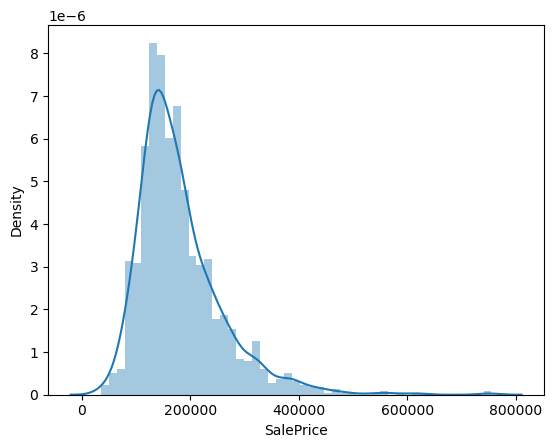

In [28]:
sns.distplot(train["SalePrice"])

<AxesSubplot: >

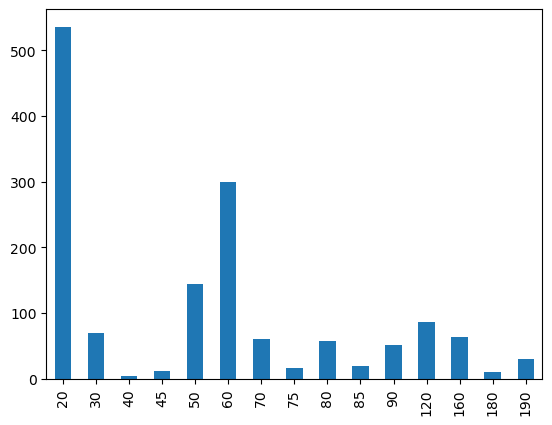

In [29]:
subclass = train["MSSubClass"]
subclass_counts = subclass.value_counts()
subclass_counts
subclasses = subclass.unique()
subclasses.sort()
subclass_counts = subclass_counts[subclasses]
subclass_counts.plot.bar()

<AxesSubplot: xlabel='MSSubClass', ylabel='SalePrice'>

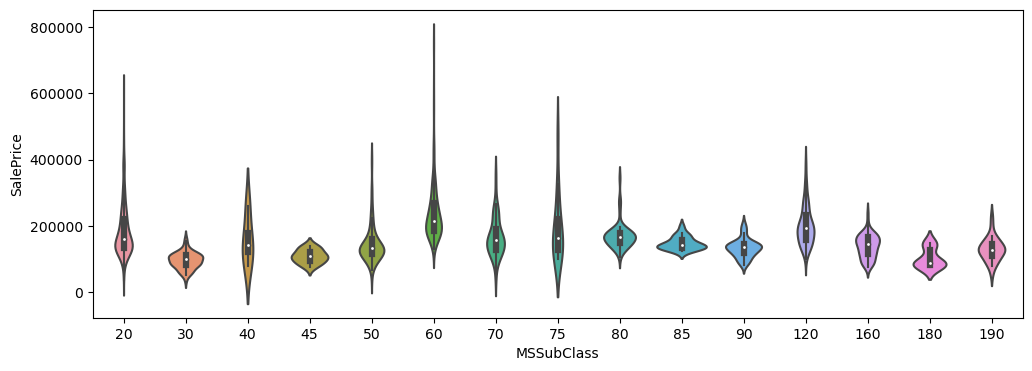

In [30]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,4))
sns.violinplot(data = train, x = "MSSubClass", y = "SalePrice" , ax = ax)

(array([536.,  69.,   4.,  12., 144., 299.,  60.,  16.,  58.,  20.,  52.,
         87.,  63.,  40.]),
 array([ 20.,  30.,  40.,  45.,  50.,  60.,  70.,  75.,  80.,  85.,  90.,
        120., 160., 180., 190.]),
 <BarContainer object of 14 artists>)

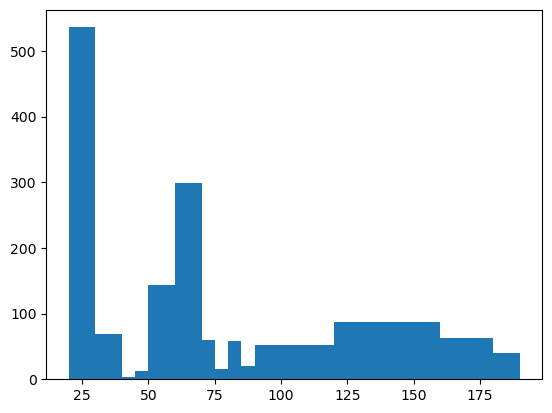

In [31]:
plt.hist(subclass, bins = subclasses)

## We go for a smaller model

In [32]:
columns_less = ['MSSubClass', 'LotFrontage', 'MasVnrType', 'OverallQual', 'LotArea', 'Neighborhood', 'GrLivArea', 'SalePrice']
train_small = train[columns_less]
train_small.head()

,MSSubClass,LotFrontage,MasVnrType,OverallQual,LotArea,Neighborhood,GrLivArea,SalePrice
0,60,65.0,BrkFace,7,8450,CollgCr,1710,208500
1,20,80.0,None,6,9600,Veenker,1262,181500
2,60,68.0,BrkFace,7,11250,CollgCr,1786,223500
3,70,60.0,None,7,9550,Crawfor,1717,140000
4,60,84.0,BrkFace,8,14260,NoRidge,2198,250000


In [33]:
train_small.Neighborhood.value_counts();


Filling nan values for the LotFrontage variables

In [34]:
# Checking nan values
index = train_small['LotFrontage'].isna()
train_small['LotFrontage'][index];

In [35]:
# train_OHE['LotFrontage'].median()
train_small['LotFrontage'].fillna(train_small['LotFrontage'].median(), inplace=True)
train_small['LotFrontage'][index];
#print([i for i in train_OHE.isna().sum() if i > 0])
#train_OHE.isna().sum().any()

/tmp/ipykernel_14590/1683090156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_small['LotFrontage'].fillna(train_small['LotFrontage'].median(), inplace=True)


Fillna for the MasVnrType variable

In [36]:
#train.MasVnrType.value_counts()
#train.MasVnrType[1]
#train.MasVnrType[train.MasVnrType.isna()]
train_small.MasVnrType.fillna('NA', inplace=True);


/tmp/ipykernel_14590/403859249.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_small.MasVnrType.fillna('NA', inplace=True);


One hot encoding of categorical variables

In [37]:
train_OHE = pd.get_dummies(train_small, columns=['MSSubClass', 'MasVnrType', 'Neighborhood'], drop_first=True)


In [38]:
train_OHE.head()

,LotFrontage,OverallQual,LotArea,GrLivArea,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,65.0,7,8450,1710,208500,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,80.0,6,9600,1262,181500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,68.0,7,11250,1786,223500,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,60.0,7,9550,1717,140000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,84.0,8,14260,2198,250000,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


# Let's start regression
Let's split between predictors and outcome

In [39]:
X = train_OHE.loc[:, train_OHE.columns != 'SalePrice']
y = train_OHE['SalePrice']


print(f'X and y have shape {X.shape}, {y.shape}, respectively')

X and y have shape (1460, 46), (1460,), respectively


Let's split the data between a training and a testing dataset.

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print(f'X_train and y_train have shape {X_train.shape}, {y_train.shape}, respectively')
print(f'X_test and y_test have shape {X_test.shape}, {y_test.shape}, respectively')

X_train and y_train have shape (1168, 46), (1168,), respectively
X_test and y_test have shape (292, 46), (292,), respectively


First model using sklearn linear regression

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f'R-squared is {model.score(X_train, y_train)}')
y_pred = model.predict(X_train)
print('real: ', y_pred[:3], '\n', 'predicted: ', y_train.iloc[:3].values)

R-squared is 0.8163096390115477
real:  [146224.90629172 176396.78046585  90240.87970019] 
 predicted:  [145000 178000  85000]


Now use the statsmodel library for linear regression, including all columns

In [42]:
import statsmodels.api as sm

# Include intercept: needed in statsmodels
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit linear regression model
model = sm.OLS(y_train, X_train).fit()

# View model summary
print(model.summary())
# model.rsquared

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     108.3
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:16:44   Log-Likelihood:                -13813.
No. Observations:                1168   AIC:                         2.772e+04
Df Residuals:                    1121   BIC:                         2.796e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.401e+04 

In [43]:
def r2_score_adj(y_actual, y_pred, model):
    """Calculating the adjusted R2"""
    from sklearn.metrics import r2_score
    r2 = r2_score(y_actual, y_pred)
    p = len(model.params.index)
    n = len(y_actual)
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)


We want to see if we can pick only the useful variables.
To do so we initialise the model to an "empty" one, and add a feature at at time, in case the feature improves the model. We use adjusted R2 squared on the testing data as metric.

In [51]:
def feature_selection(X_train, y_train, X_test, y_test):

    col_list = []
    current = 0
    current_highest = 0
    best_feature = ''
    go_next = True
    features_remaining = list(X_train.columns)
    previous_highest = 0

    while go_next:
        go_next = False
        for column in features_remaining:
            col_list_temp = col_list + [column]

            X_train_select = X_train.loc[:, (X_train.columns.isin(col_list_temp))]
            X_test_select = X_test.loc[:, (X_test.columns.isin(col_list_temp))]

            model = sm.OLS(y_train, X_train_select).fit()
            y_pred = model.predict(X_test_select)

            current = r2_score_adj(y_test, y_pred, model)
            if (current > current_highest) & (current > previous_highest):
                current_highest = current
                best_feature = column
                go_next = True


        print(f'Current_highest: {current_highest}, previous Highest: {previous_highest}')
        #view model summary
        if len(features_remaining) == 0:
            break
        if go_next:
            col_list = col_list + [best_feature]
            features_remaining.remove(best_feature)
            previous_highest = current_highest
    
    X_train_final = X_train.loc[:, (X_train.columns.isin(col_list))]
    model = sm.OLS(y_train, X_train_final).fit()

    return model


Get the best model.

In [52]:
model = feature_selection(X_train, y_train, X_test, y_test)

Current_highest: 0.5652644215673962, previous Highest: 0
Current_highest: 0.6479224707068022, previous Highest: 0.5652644215673962
Current_highest: 0.6968914914289195, previous Highest: 0.6479224707068022
Current_highest: 0.7631659606365804, previous Highest: 0.6968914914289195
Current_highest: 0.7766100392804669, previous Highest: 0.7631659606365804
Current_highest: 0.7858794454666729, previous Highest: 0.7766100392804669
Current_highest: 0.7944463394868562, previous Highest: 0.7858794454666729
Current_highest: 0.7995903046528863, previous Highest: 0.7944463394868562
Current_highest: 0.8042738455644314, previous Highest: 0.7995903046528863
Current_highest: 0.8066334893077687, previous Highest: 0.8042738455644314
Current_highest: 0.8080580367753306, previous Highest: 0.8066334893077687
Current_highest: 0.8097693266654316, previous Highest: 0.8080580367753306
Current_highest: 0.8119383830464781, previous Highest: 0.8097693266654316
Current_highest: 0.8138037062714918, previous Highest: 

In [46]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     210.4
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:16:48   Log-Likelihood:                -13858.
No. Observations:                1168   AIC:                         2.776e+04
Df Residuals:                    1145   BIC:                         2.788e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -4.031e+04 

The next step is to further reduce the feature set according to different metrics. For example the statistical significance of the parameters.

In [64]:
col_list = model.params.index.tolist()
to_remove_list = ['MasVnrType_None', 'MasVnrType_BrkFace', 'Neighborhood_Crawfor']

for feature in to_remove_list:
    if feature in col_list:
        col_list.remove(feature)

#col_list.remove('MasVnrType_None')
#col_list.remove('MSSubClass_80')

Update the training and testing data

In [65]:
X_train_select = X_train.loc[:, (X_train.columns.isin(col_list))]
X_test_select = X_test.loc[:, (X_test.columns.isin(col_list))]


Get the final model

In [ ]:
model = sm.OLS(y_train, X_train_select).fit()
print(model.summary())